In [1]:
import sys
sys.path.append(r'C:\workspace\DataAnalysis')

from src.main.python.process import Process
from src.main.python.utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 4000


### Overview

In [2]:
df = load_csv('../data/Insurance_claims_event_log.csv', timestamp_cols=['timestamp'])
case = 'case_id'
activity = 'activity_name'
timestamp = 'timestamp'

process = Process(df, case, activity, timestamp)

In [3]:
casetable = process.get_casetable()
casetable.head(3)

,case_id,agent_name,claim_amount,adjuster_name,claimant_age,claimant_name,type_of_policy,car_make,type_of_accident,user_type,car_year,car_model,activity_count,case_start,case_end,leadtime,trace
0,000112d5-9d04-450f-820f-3edfc0626cf9,Hannah Lopez,9266.19,Joy Simpson,60,Kimberly Collins,Comprehensive,Hyundai,Head-on,Human,2021,Elantra,6,2022-04-19 01:47:54.857481,2022-05-20 15:04:57.957352,2.726223e+09,First Notification of Loss (FNOL)>Assign Claim...
1,0001c62c-696c-4251-a604-8d319fc73fac,Kimberly Baird,4636.30,Joseph Pham,21,Lisa Adkins,Comprehensive,Nissan,Head-on,Human,2012,Altima,6,2023-02-15 11:04:00.795831,2023-03-18 03:23:37.034387,2.650776e+09,First Notification of Loss (FNOL)>Assign Claim...
2,00048c02-65b5-423b-bf38-139a099a5624,Patrick Downs,4897.70,Samuel Holt,44,Derek Montgomery,Comprehensive,Hyundai,Rear-end,RPA,2011,Elantra,6,2022-10-17 07:17:51.529389,2022-11-20 19:31:26.381136,2.981615e+09,First Notification of Loss (FNOL)>Assign Claim...


In [4]:
process.set_timeunit('h')
pathtable = process.get_pathtable()
pathtable.groupby('path')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
path,,,,,,,,
Assign Claim>Claim Decision,29621.0,121.135973,46.645409,0.389857,88.679493,120.784528,152.575665,308.577376
Assign Claim>Payment Sent,8.0,124.361812,46.851295,34.636963,107.267712,124.670156,147.929850,189.578396
Assign Claim>Set Reserve,371.0,107.344365,46.806208,0.067956,71.453568,106.661352,144.716066,238.723418
Claim Decision>Assign Claim,190.0,16.087173,13.537895,0.106382,5.779554,12.317304,23.861159,63.685603
Claim Decision>Close Claim,8.0,91.752090,47.322282,31.920299,54.476245,102.309044,109.631378,175.201653
Claim Decision>Payment Sent,358.0,108.967172,49.824434,2.431336,74.760836,107.142471,143.521725,264.563281
Claim Decision>Set Reserve,29444.0,121.028095,47.137476,0.286609,88.537947,120.814466,152.829791,350.064752
Close Claim>Payment Sent,178.0,15.008516,14.282542,0.255041,3.620480,11.276205,20.666657,71.950548
Close Claim>Set Reserve,2.0,12.631043,12.803484,3.577613,8.104328,12.631043,17.157758,21.684474


In [20]:
pathtable.groupby('from_activity')['duration'].describe()
pathtable.groupby('to_activity')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
from_activity,,,,,,,,
Assign Claim,30000.0,120.966277,46.670818,0.067956,88.496757,120.559719,152.462714,308.577376
Claim Decision,30000.0,120.211736,47.781029,0.106382,87.596473,120.268004,152.504120,350.064752
Close Claim,180.0,14.982099,14.236925,0.255041,3.590734,11.276205,20.711483,71.950548
First Notification of Loss (FNOL),30000.0,360.155938,48.144093,181.197971,327.297675,360.342549,392.646398,555.152703
Payment Sent,29823.0,119.714184,47.636692,0.024665,87.394206,119.187346,151.495144,318.781211
Set Reserve,29997.0,119.947328,47.652011,0.046011,87.471445,119.678639,152.139731,301.643593


,count,mean,std,min,25%,50%,75%,max
to_activity,,,,,,,,
Assign Claim,30000.0,358.032525,55.311668,0.106382,326.605592,360.002026,392.457355,555.152703
Claim Decision,30000.0,121.900096,50.608083,0.047731,88.271108,120.794398,153.078911,469.257707
Close Claim,30000.0,120.234459,47.064597,0.024665,87.820152,119.402073,151.588783,318.781211
Payment Sent,30000.0,119.988797,47.620007,0.046011,87.557084,119.719615,152.120608,301.643593
Set Reserve,30000.0,120.211169,47.773005,0.050842,87.560976,120.293412,152.513313,354.784718


In [8]:
capacity = process.get_capacity('adjuster_name')
capacity.sort_values('capacity', ascending=False)

,adjuster_name,capacity
17687,Michael Smith,90.0
17541,Michael Johnson,78.0
10036,James Smith,72.0
10892,Jennifer Jones,72.0
10779,Jennifer Brown,60.0
...,...,...
9001,Gregory Jordan,6.0
8999,Gregory Jimenez,6.0
8998,Gregory Jarvis,6.0
8995,Gregory Hopkins,6.0


####  상관관계

In [54]:
# 스피어만 상관계수 - 이진 범주형 변수와 연속형 변수의 상관계수

correlation, p_value = stats.spearmanr(
    casetable['user_type'], 
    casetable['leadtime']
)
print('Spearman Correlation:', correlation)
print('p-value:', p_value)

Spearman Correlation: -0.0002676074418456186
p-value: 0.9630320545448735


In [55]:
# ANOVA - 범주형 변수와 연속형 변수의 평균값 차이를 검정
f_statistic, p_value = stats.f_oneway(
    casetable.loc[casetable['car_model']=='Elantra', 'leadtime'], 
    casetable.loc[casetable['car_model']=='Altima', 'leadtime']
)
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 0.9404139864973884
p-value: 0.3321995028619955


In [58]:
# Kruskal-Wallis 검정 - 범주형 변수와 연속형 변수의 평균값 차이를 검정
h_statistic, p_value = stats.kruskal(
    casetable.loc[casetable['car_model']=='Elantra', 'leadtime'], 
    casetable.loc[casetable['car_model']=='Altima', 'leadtime']
)
print('Kruskal-Wallis Statistic:', h_statistic)
print('p-value:', p_value)

Kruskal-Wallis Statistic: 0.48525030548262293
p-value: 0.4860537195394189


In [57]:
# 카이제곱 검정 - 범주형 변수 범주형 변수간의 연관성

chi2_stat, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(casetable['type_of_accident'], casetable['car_model'])
)
print('Chi-Square Statistic:', chi2_stat)
print('p-value:', p_value)

Chi-Square Statistic: 28.775117728397877
p-value: 0.05119767071031244


### Visualize

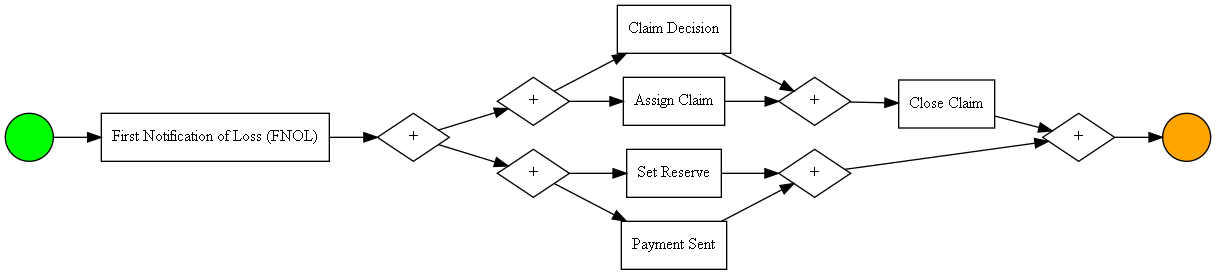

../result/bpmn.png is saved.


In [7]:
# BPMN 모델
process.save_bpmn('../result/bpmn.png')

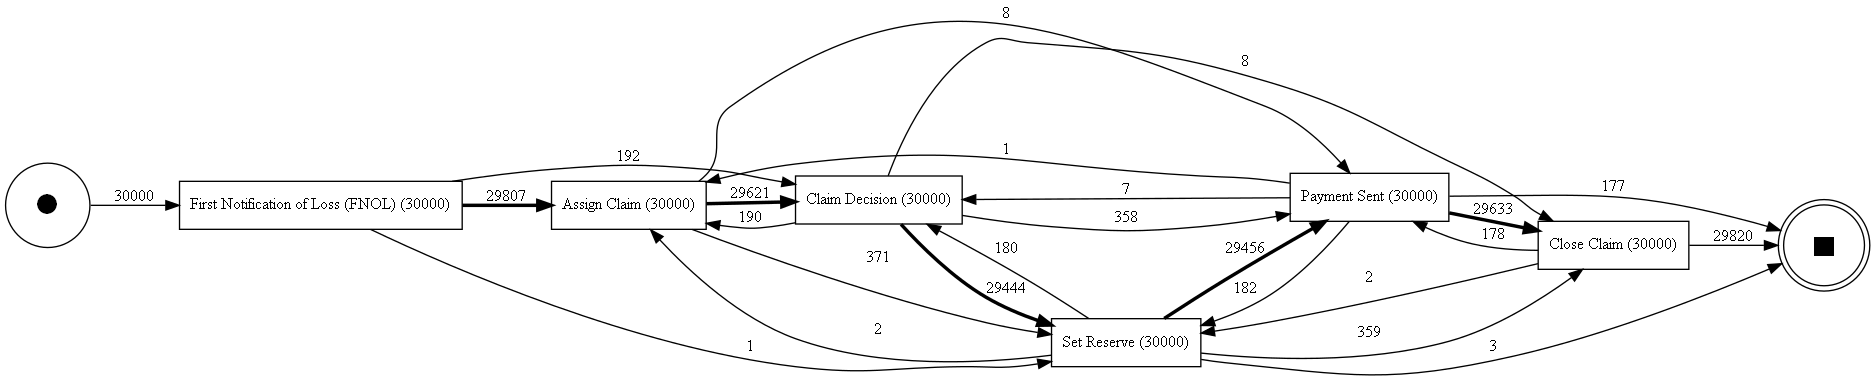

../result/process_map.png is saved.


In [6]:
# process map 모델
process.save_dfg('../result/process_map.png')